In [3]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [4]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [5]:
# Criando a árvore de decisão com o algoritmo ID3
# Precisamos converter os dados categóricos em numéricos
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d) # Mapeando a coluna Hired utilizando o valor de d
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d) # Mapeando a coluna Level of Education utilizando o valor de d
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [6]:
features = list(df.columns[:6]) # Pegando as 6 primeiras colunas
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [7]:
y = df["Hired"] # Coluna Hired
X = df[features] # Colunas de features
clf = tree.DecisionTreeClassifier() # Instanciando o classificador
clf = clf.fit(X,y) # Treinando o classificador

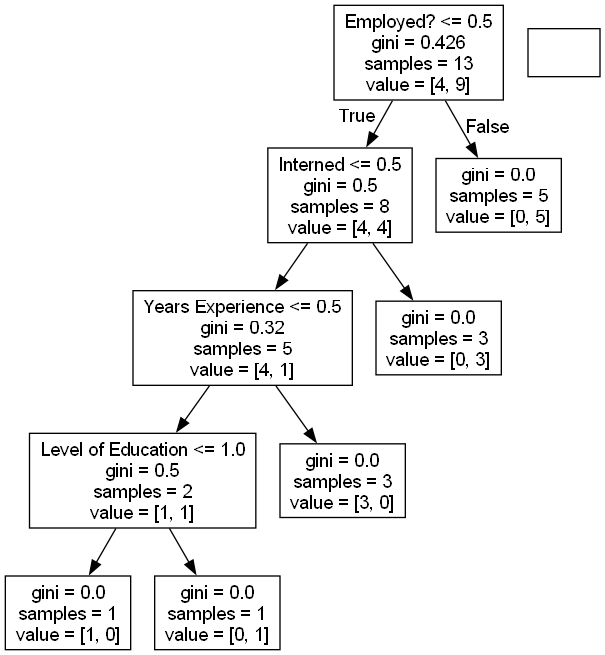

In [8]:
from IPython.display import Image
from six import StringIO
import pydotplus
import graphviz

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Utilizando Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10) # 10 árvores
clf = clf.fit(X, y)

print(clf.predict([[10, 1, 4, 0, 0, 0]])) # 10 anos de experiência, empregado, com 4 antigos trabalhos
print(clf.predict([[10, 0, 4, 0, 0, 0]])) # 10 anos de experiência, desempregado, com 4 antigos trabalhos

# O resultado foi 1 e 0, respectivamente, ou seja, a primeira pessoa foi contratada e a segunda não.
# o engraçado é perceber que o resultado não é o mesmo toda vez que é executado, 
# isso ocorre porque o algoritmo é baseado em árvores de decisão, que são aleatórias.

[1]
[1]


C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
